# Tasks

These are my solutions to the tasks that I must complete for the 2020 Emerging Technology module. My name is Sagheer Ahmad (G00357770@gmit.ie).
***

#### Task 1: Calculate a square root to 100 decimal places

One of the ways we can calculate the square root of a number is by using Newton's Method.[1,2,3]. Newton's Method uses a specific formula, seen below, to calculate the square root. It is known an an iterative method and approximates roots of equations. The algorithm starts off by guessing the square root of the given number as x > 0. It then computes a more accurate guess by taking the derivative of f(x) to get f'(x) and plug it into the formula. We then repeat the formula until we get a better and more accurate guess. The problem that I encountered with this formula was that it does not print out the value to 100 decimal places. It prints out the first 52 values and the rest are left as Zeros.

<br />

$$ z_{next} = z - \frac{z^2 -x}{2z} $$

<br /> <br />

The formula shown below is another way of calculating the the square root of 2. The first thing the method is doing is setting the x value from the user to, x multiplied by 10 to the power of 200. This will take all the numbers from the right side of the decimal place and brings it to the left side. The method has 2 other variables, one is a variable used in the while loop while the other is a googol. The while loop keeps running until an accurate guess is made. Inside the while loop we are setting b to z and then calculating a better guess for z. The guess is using floor devision because we do not want any decimal places in the answer. The guess is also being bitshifted to the right, the bitshifting shifts the bits of the first operand right by the specified number of bits.[6] Once the guess is accurate the while loop stops and prints out the value. I first had it so the program prints the value z staright away but this was a problem because when it was printed out, the value was a big number with no decimal places. In order to add a decimal place the number had to be converted into a list and the . could be inserted then. The list is then joined together and printed out as a string.

All the references used for this task and further information about this task can be found in the README.

In [1]:
#Calculate the sqaure root of a number
def sqrt2(x):
    
    """
    A function to calculate the square root of a number x.
    """
    
    # Initial guess for the square root z.
    #z = x / 2
    
    #while abs(x - (z * z)) > 0.000001: Newtons Method
    #Newthon's Method
        #z -= (z*z - x) / (2 * z)
    
    #bring all the numbers from the right to the left
    x = x * (10**(200))
    y = 0
    #set z to a googol
    z = 1 * (10**100)
    
    # Loop until we are happy with the accuracy.
    while y != z:     
        #set y to z
        y = z
        # get the square root and get the floor division
        #bit shift 1 to the right
        z = (y + (x // y)) >> 1
        
    #convert square root to a list
    listZ = list(str(z))
    #add the . after the first number
    listZ.insert(1, '.')
    #join the . to the numbers
    num = "".join(listZ)
    #return the (approximate) square root of x as a string
    return num

##### Tests of the sqrt function - Testing the function with known values

***

In [78]:
#Test the function with random values
sqrt(2)

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

In [79]:
sqrt(5)

'2.2360679774997896964091736687312762354406183596115257242708972454105209256378048994144144083787822749'

#### Task  2: Use scipy.stats to verify this value and calculate the associated p value
-------------------------------------------------------------------------------

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article in the research section, gives the table below as an example [1],
stating the Chi-squared value based on it is approximately 24.6. <br><br>

|             | A   | B   | C   | D   | Total  |
| ----------- | ----| ----| ----| ----|--------|
| White collar| 90  | 60  | 104 | 95  | 349    |
| Blue collar | 30  | 50  | 51  | 20  | 151    |
| No collar   | 30  | 40  | 45  | 35  | 150    |
| Total       | 150 | 150 | 200 | 150 | 650    |

<br><br>

The code below is verifying that the chi square value is correct and also prints out the p value. I first had to import the scipy.stats library in order to get the relevant values. I then used a variable to declare the data that we are being asked to use from the wikipedia page. The values are written in rows so the first row would be [90, 60, 104, 95]. I next use the scipy.stats library to figure out the Expected value, the p value, the actual chi square value and the degree of freedom. This is done by using the chi2.contigency function that is built in the scipy.stats library. This function takes in a variable. So I created a variable and populated it with the table data and used that in the function. The " stats.chi2_contingency(data)" then returns 4 different values, which are, the chi squared value, the p value, the degrees of freedom and the expected frequencies. This method returns all those values based on the marginal sums under the assumption of independence. The assumptions are:

1. the observations are independent and
2. normally distributed 

All the references used for this task and further information about this task can be found in the README.

In [2]:
#required class - print out the table
import scipy.stats as stats

#data to be inserted into the columns
data = [[90,60,104,95], [30,50,51,20],[30,40,45,35]]

#returns 4 values
#Get the chi square value, the p value, the degree of freedom and the expected frequencies
chi2, p, dof, ex = stats.chi2_contingency(data)

#the chi squared value
print("The approximate chi squared value is: %.1f" % chi2, "\n")
#the associated p value
print("The associated p value is:", p, "\n")
# the degrees of freedom - number of values in the final calculation of a statistic that are free to vary
print("The Degree of Freedom is:" ,dof, "\n")
#the expected frequencies
print("The expected frequencies are: \n",ex, "\n")

The approximate chi squared value is: 24.6 

The associated p value is: 0.0004098425861096696 

The Degree of Freedom is: 6 

The expected frequencies are: 
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]] 



#### Task 3: Research the excel functions and use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.
------------------------------------------------------------------------------------------------------------------------------
When dealing with statistical data it is evident that there are two data sets that can be used to get the standard deviation. There are population and sample data sets. In this task I will try to differenciate between the two and try to explain why STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

Firstly lets get the defenition of both of them: [1]

A population is:

```
A population is the entire group that you want to draw conclusions about.
```

While a sample is: 

```
A sample is the specific group that you will collect data from. The size of the sample is always less than the total size of the population.
```

It is always a good idea to know what data set to use when getting the standard deviation. As we already know there is only one difference between the two formulas. The population data set uses the formula:  
  
```np.sqrt(np.sum((x - np.mean(x)) ** 2)/len(x))```

while the sample data set uses the formula:  

```np.sqrt(np.sum((x - np.mean(x)) ** 2)/len(x)) -1```

Consider the following:

(A) You are an English teacher in a secondary school and you want to do a statistical analysis on all the exam results from your class in the last year. This will be a population data set because In this case you only need to get the data from your own class and not all the english classes in the school. The intent is only to estimate the students in your own class and because of this you have all the population.[2]

(B) You are an English teacher in a secondary school and you want to do a statistical analysis on all the english exam results in the last year across the world. This will be a sample data set because the data set is huge. There is no way of getting the full data from such a huge dataset. In this case you will have to use a smaller dataset and make a generalization of your findings.[2]

The syntax for using the population sample data is "STDEV.P(number1,number2,...)". The syntax for for the sample data is very similar but the p is replaced by a s, "STDEV.S(number1,number2,...)".[3][4].

![Excel Standard Deviation](https://i.gyazo.com/d068556b93ca6d89853259b31d07af2b.png "Excel Example for Standard Deviation")

The above image shows how to get the standard deviation in Excel. I made a random sample data to test both the sample and population dataset in excel. As you can see the sample data is higher than the population data.

###### References
---------------------------------------------------------------------------------------

[1]The difference between population and sample:   
[https://www.scribbr.com/methodology/population-vs-sample/  ]  
  
[2]Population vs Sample Data:  
[http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html  ]  
    
[3]How to use stdev.p in excel:  
[https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html]  
  
[4]How to use stdev.s in excel:  
[https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html]  

In [1]:
#adapted from https://stackoverflow.com/questions/64884294/stdev-s-and-stdev-p-using-numpy

import numpy as np

x = [9,2,5,4,12,7,8,11,9,3,7,4,12,5,4,10,9,6,9,4]
print("Population: ", np.sqrt(np.sum((x - np.mean(x))**2)/len(x))) # population
print("Sample: ", np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1)) # sample

Population:  2.9832867780352594
Sample:  2.8106938645110393


<hr>
There is a slight difference in the population and sample dataset. This can be seen above in the code cell. The small difference in the answers allows the sample data to get a better mathematical estimate of the population. It statistically gives a better estimate than population due to it working with only a small sample than the entire population.

#### Task 4: Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set.
------------------------------------------------------------------------------------------------------------------------------

<b>What is the Iris Dataset?</b>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.[1]


Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]  

In [38]:
#required imports

# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

# handling data
import pandas as pd 

#import the iris dataset
from sklearn.datasets import load_iris

In [45]:
#adapted from https://www.youtube.com/watch?v=asW8tp1qiFQ&ab_channel=DragonflyStatistics
iris = load_iris()

In [46]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(iris.data)

In [77]:
# See the labels of the points.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

(1.0, 5.0)

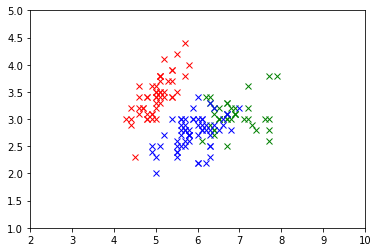

In [78]:
# Plot the data set.
plt.plot(iris.data[kmeans.labels_ == 0][:,0], iris.data[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(iris.data[kmeans.labels_ == 1][:,0], iris.data[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(iris.data[kmeans.labels_ == 2][:,0], iris.data[kmeans.labels_ == 2][:,1], 'bx')

# Set reasonable limits.
plt.xlim([2,10])
plt.ylim([1,5])

In [79]:
# Predict the cluster
predictions = kmeans.predict(iris.data)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

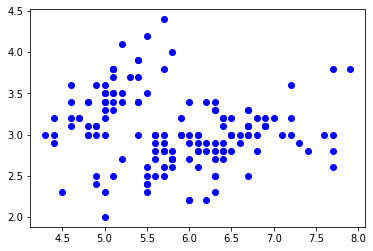

In [80]:
plt.plot(iris.data[:,0], iris.data[:,1], 'bo')

In [75]:
cent = kmeans.cluster_centers_
cent

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

<hr>
End